In [15]:
import yfinance as yf
import pandas as pd
from tqdm.notebook import tqdm
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
from scipy.signal import argrelextrema
import os
import time
import random
import string
import requests
import datetime
import importlib
import functions as f
import indices as i
import logics  as l
import indices
import importlib
# # importlib.reload(functions)
importlib.reload(i)
importlib.reload(f)
importlib.reload(l)
# importlib.reload(l)
# # for module in [f, i, l]:
# #     importlib.reload(module)

<module 'logics' from 'c:\\Users\\Dan\\Desktop\\github\\Data-Projects\\Vega\\logics.py'>

In [11]:
yahoo_df = f.yahoo_data()
yahoo_df_agg = f.aggregate_ticker_stats(yahoo_df)

[*********************100%***********************]  1 of 1 completed


c:\Users\Dan\Desktop\github\Data-Projects\Vega\functions.py:139: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'local_min' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ticker_df['Date'] = pd.to_datetime(ticker_df['Date'])


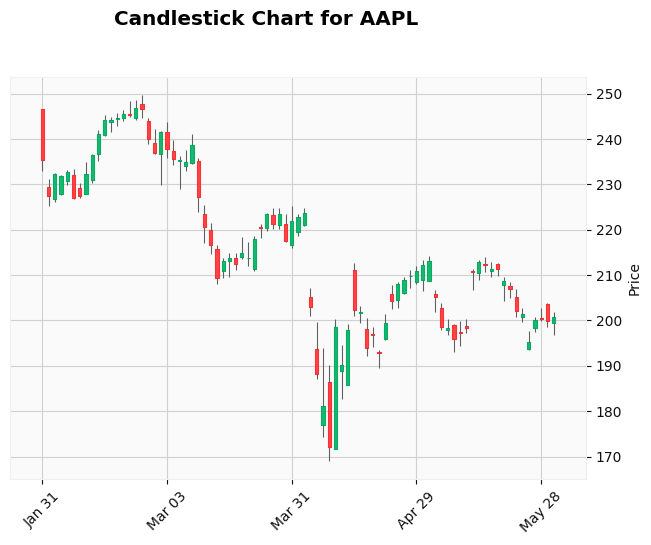

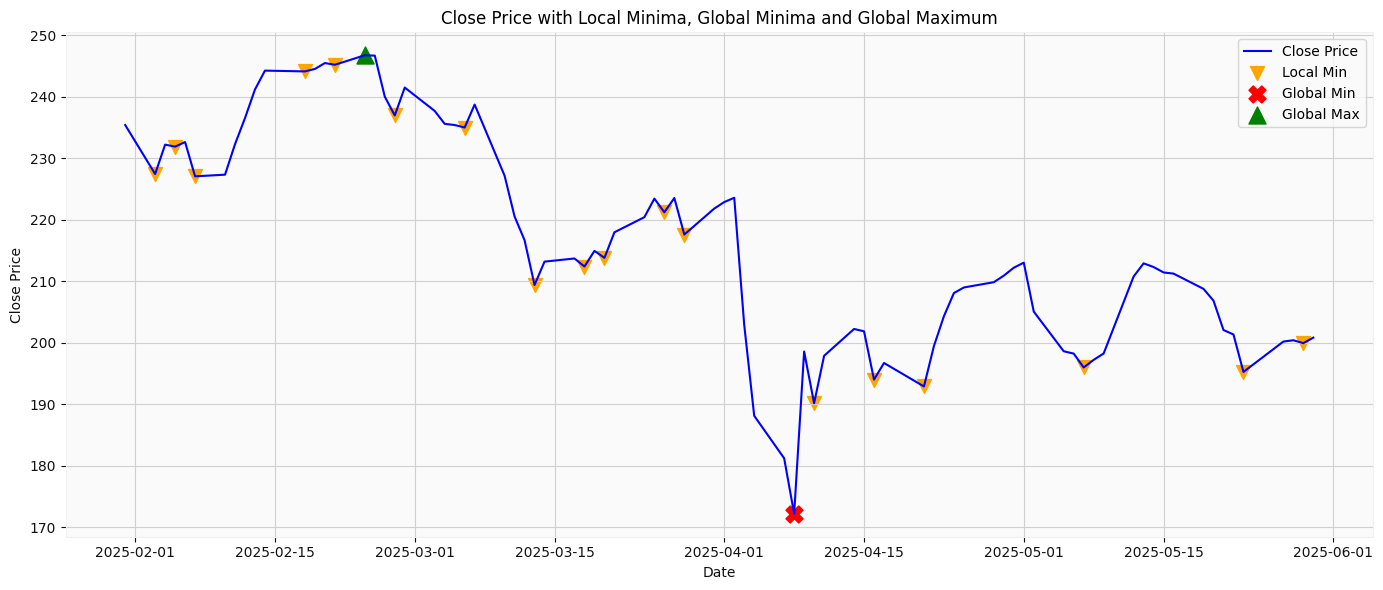

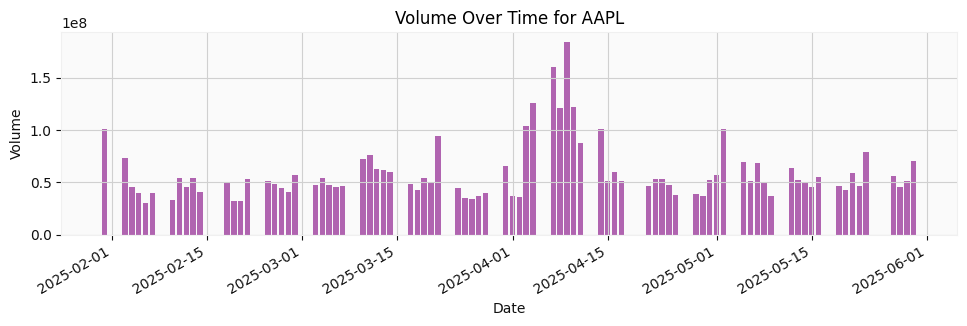

Percentiles for closing prices of AAPL:
10th percentile: 196.82
20th percentile: 200.05
30th percentile: 203.77
40th percentile: 210.60
50th percentile: 213.04
60th percentile: 220.46
70th percentile: 227.12
80th percentile: 235.27
90th percentile: 240.98


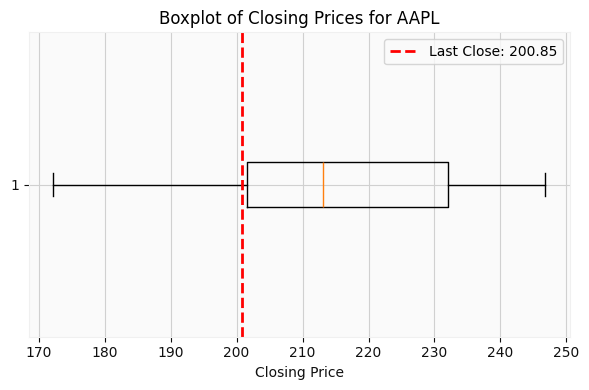

In [14]:
f.stats('AAPL')

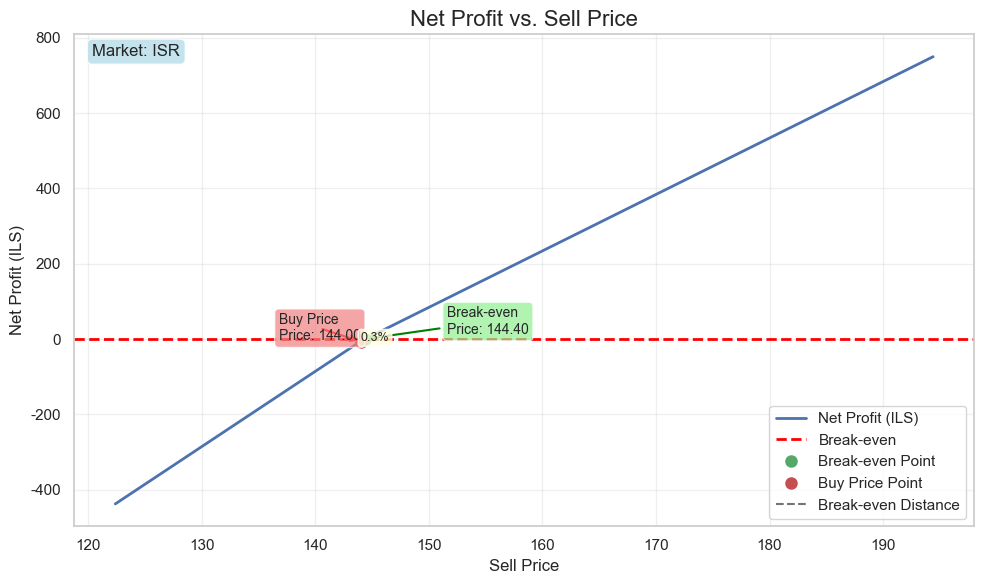


DETAILED TRADE DATA SUMMARY

STATISTICAL SUMMARY:
Ticker: CASTRO.TA
--------------------------------------------------
Purchase Price:       144.00
Number of Shares:     20
Total Paid:           2880
Currency:             ILS
Market:               ISR
Break Even Price:     144.40
Target Sell Price:    1650.00
Gross Amount:         30120.00 ILS
Tax Paid:             7530.00 ILS
Revenue Percentage:   1045.83%
Net Amount:           22563.90 ILS
Normalized Amount:    1128.20 ILS per share
Total Net Profit:     22563.90 ILS


,Buy Price,Sell Price,Total Paid (ILS),Num Shares,Currency,Market,Gross Profit (ILS),Tax (ILS),Net Profit (ILS),Net Profit per Share (ILS),Total Net Profit (ILS),Revenue %
0,144,1650,2880,20,ILS,ISR,30120,7530.0,22563.9,1128.195,22563.9,1045.833333


In [1129]:
f.calculate_trade_profit(
    num_shares=20,
    buy_price=144,
    sell_price=1650,
    market='ISR',
    currency='ILS',
    ticker='CASTRO.TA',
    )

In [16]:
# rank_tickers_tester_df = rank_tickers_tester(yahoo_df_agg, raw_df=yahoo_df, interval_days=10)
rank_tickers_advanced_tester_df = l.rank_tickers(yahoo_df_agg, raw_df=yahoo_df, interval_days=10)

In [1107]:
# earnings_calendar_df

In [1108]:
# rank_tickers_tester_df[(rank_tickers_tester_df['rank'] == 2) | (rank_tickers_tester_df['rank'] == 3)]

In [1109]:
reports = f.get_weekly_earnings_calendar(days_ahead=7,api_key=API_KEY)

In [1110]:
# reports[reports['symbol'] == 'CRM']
# reports[reports['epsEstimate'] > 0] 

c:\Users\Dan\AppData\Local\Programs\Python\Python313\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\Dan\AppData\Local\Programs\Python\Python313\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

<Figure size 1200x600 with 0 Axes>

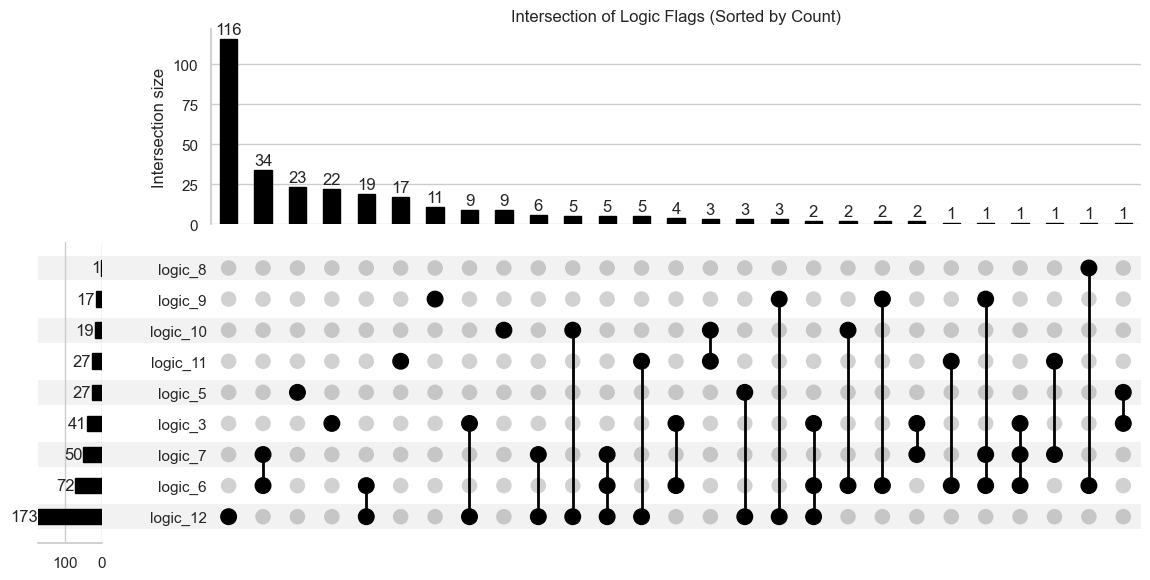

In [1152]:
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt

intersection_df = rank_tickers_advanced_tester_df[rank_tickers_advanced_tester_df['final_rank'] >= 1 ]
logic_cols = [col for col in intersection_df.columns if col.startswith('logic_')]
logic_df = intersection_df[logic_cols].astype(bool)
logic_cols_sorted = sorted(logic_cols, key=lambda c: logic_df[c].sum(), reverse=True)
logic_df_sorted = logic_df[logic_cols_sorted]

upset_data = from_indicators(logic_cols_sorted, logic_df_sorted)

plt.figure(figsize=(12,6))
UpSet(upset_data, show_counts=True, sort_by='cardinality').plot()
plt.title("Intersection of Logic Flags (Sorted by Count)")
plt.show()

* logic_1: Flags tickers where the last close is lower than the 10th percentile of historical closes.
* logic_2: Flags tickers where the normalized standard deviation is above a given threshold (default 0.1).
* logic_3: Flags tickers where the global minimum close occurred in the last interval, but not on the last day.
* logic_4: Flags tickers where the global minimum close is at least 3 standard deviations below the median close.
* logic_5: Flags tickers showing a bullish engulfing candlestick pattern on the last two days.
* logic_6: Flags tickers where the last day forms a hammer candlestick pattern.
* logic_7: Flags tickers where the last day is a doji candlestick and its open is higher than the previous day's open.
* logic_8: Flags tickers with a report in the next 7 days with positive prediction.
* logic_9: Flags tickers where the short moving average (e.g., 7 days) crosses above the long moving average (e.g., 21 days) on the last day (MA/EMA cross).
* logic_10: Flags tickers where the z-score of the last close vs moving average (e.g., 21 days) is less than a threshold (default -2), indicating mean reversion.
* logic_11: Flags tickers where the moving average (window) is strictly increasing at each interval split (i.e., מגמת עלייה רציפה בממוצע נע בין אינטרוולים).
* logic_12: Flags tickers where there is a sudden spike in trading volume, measured by z-score, in the last interval (i.e., זינוק חריג בנפח מסחר לפי z-score באינטרוול האחרון).

In [ ]:
# בחר אילו לוגיקות לסנן (True/False)
logic_filters = {
    # 'logic_1': False,
    # 'logic_2': False,
    # 'logic_3': False,
    # 'logic_4': True,
    # 'logic_5': False,
    # 'logic_6': False,
    # 'logic_7': False,
    'logic_8': True
}

(rank_df[(rank_df[list(logic_filters)] == pd.Series(logic_filters)).all(axis=1)])

,Ticker,min_close,max_close,median_close,mean_close,std_close,normalized_std,last_close,last_date,logic_1,logic_3,logic_5,logic_6,logic_7,logic_8,rank
429,HD,335.239990,422.190735,366.489990,376.269136,23.258682,0.061814,380.779999,2025-05-16,False,False,False,True,False,True,2
488,INTU,543.121399,670.280029,599.373108,602.457480,25.429196,0.042209,670.280029,2025-05-16,False,False,False,True,False,True,2
218,CPRT,52.299999,63.840000,57.759998,57.721205,2.903145,0.050296,63.840000,2025-05-16,False,False,False,False,False,True,1


In [1114]:
# rank_df[rank_df['rank'] >= 2]